In [1]:
!gdown --id 12VrjQW6uhegTlS23L8MkHwXHroKmaCS7

Downloading...
From: https://drive.google.com/uc?id=12VrjQW6uhegTlS23L8MkHwXHroKmaCS7
To: /content/face-mask-dataset.rar
210MB [00:02, 85.0MB/s]


In [2]:
!pip install unrar

In [3]:
!unrar x /content/face-mask-dataset.rar

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0082.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0083.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0085.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0092.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0093.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maolinlin_0094.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maoxiaotong_0051.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maoxiaotong_0052.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maoxiaotong_0055.jpg       1%  OK 
Extracting  face-mask-dataset/test/without_mask/0_0_maoxiaotong_0058.jpg       1% 

In [4]:
# import the necessary packages
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib as pyplot
from google.colab import drive
import os
from tensorflow.keras.layers import SeparableConv2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
os.chdir("/content/face-mask-dataset")

In [5]:
TRAINING_DIR = "./train"
VALIDATION_DIR = "./test"
# Thư mục training with_mask 
train_with_mask_dir = os.path.join(TRAINING_DIR, 'with_mask')

# Thư mục training without_mask
train_without_mask_dir = os.path.join(TRAINING_DIR, 'without_mask')

# Thư mục validation with_mask 
vali_with_mask_dir = os.path.join(VALIDATION_DIR, 'with_mask')

# Thư mục validation without_mask 
vali_without_mask_dir = os.path.join(VALIDATION_DIR, 'without_mask')

In [6]:
train_with_mask_fnames = os.listdir(train_with_mask_dir)
print(train_with_mask_fnames[:10])

train_without_mask_fnames = os.listdir(train_without_mask_dir)
print(train_without_mask_fnames[:10])

['with_mask640.jpeg', 'with_mask195.jpg', 'with_mask406.jpg', 'augmented_image_238.jpg', 'gettyimages-1181396760.jpg', '160.jpg', '300.jpg', '123-with-mask.jpg', 'with_mask265.jpg', 'augmented_image_308.jpg']
['467.jpg', 'augmented_image_186 (2).jpg', '437 (2).jpg', '1_0_aidai_0069.jpg', 'augmented_image_238.jpg', '1_0_anhu_0167.jpg', '160.jpg', '300.jpg', 'augmented_image_220 (2).jpg', 'augmented_image_308.jpg']


In [7]:
print('Tổng số ảnh train with_mask: ', len(os.listdir(train_with_mask_dir)))
print('Tổng số ảnh train without_mask: ', len(os.listdir(train_without_mask_dir)))
print('Tổng số ảnh validation with_mask: ', len(os.listdir(vali_with_mask_dir)))
print('Tổng số ảnh validation without_mask: ', len(os.listdir(vali_without_mask_dir)))

Tổng số ảnh train with_mask:  2173
Tổng số ảnh train without_mask:  2175
Tổng số ảnh validation with_mask:  497
Tổng số ảnh validation without_mask:  497


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

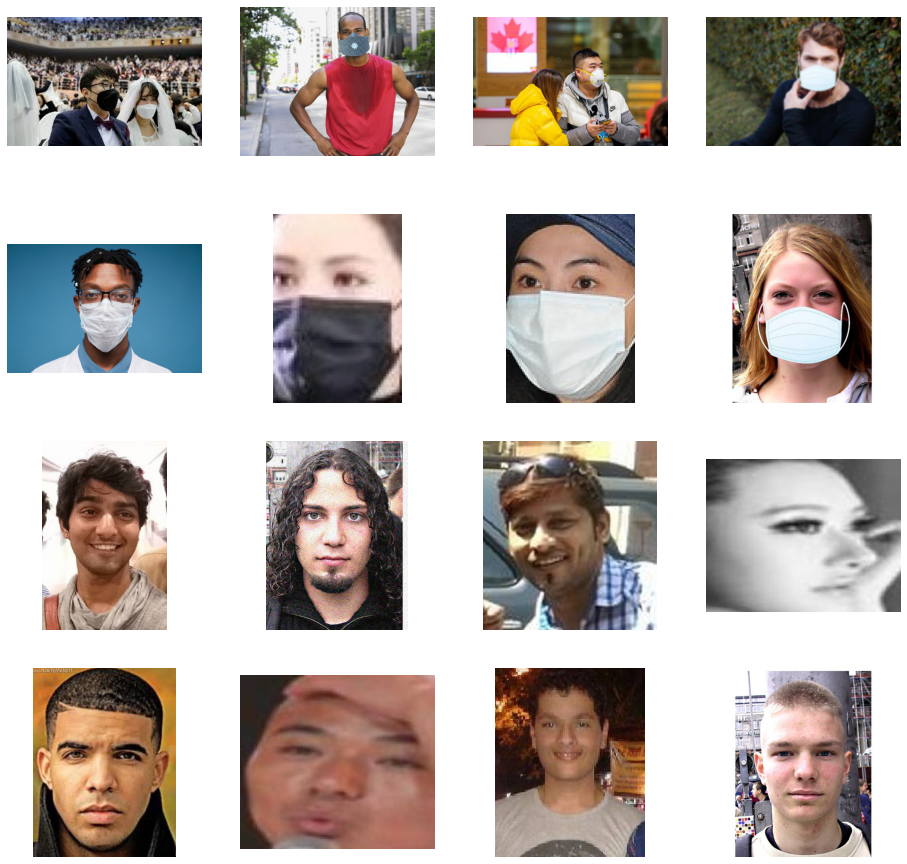

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_with_mask_pix = [os.path.join(train_with_mask_dir, fname) 
                for fname in train_with_mask_fnames[pic_index-8:pic_index]]
next_without_mask_pix = [os.path.join(train_without_mask_dir, fname) 
                for fname in train_without_mask_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_with_mask_pix + next_without_mask_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [61]:
model =Sequential([
    Conv2D(50, (3,3), activation='relu', input_shape=(150, 150, 3)),
    Conv2D(50, (3,3), activation='relu'),   
    MaxPooling2D(2,2),
    SeparableConv2D(100, (3,3), activation='relu'),   
    MaxPooling2D(2,2),
    Dropout(0.3),
    BatchNormalization(),

    Flatten(),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 50)      1400      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 146, 146, 50)      22550     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 73, 73, 50)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 71, 71, 100)       5550      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 35, 35, 100)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 35, 35, 100)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 35, 35, 100)     

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [64]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

Found 4348 images belonging to 2 classes.


In [65]:
# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow validation images in batches of 10 using val_datagen generator
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 994 images belonging to 2 classes.


In [66]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history = model.fit_generator(train_generator,
                              epochs=100,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
104/435 [======>.......................] - ETA: 29s - loss: 0.6314 - acc: 0.7525

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


435/435 [==============================] - 43s 97ms/step - loss: 0.4859 - acc: 0.8055 - val_loss: 0.3951 - val_acc: 0.9085
Epoch 2/100
435/435 [==============================] - 42s 97ms/step - loss: 0.3522 - acc: 0.8574 - val_loss: 0.2304 - val_acc: 0.9215
Epoch 3/100
435/435 [==============================] - 42s 96ms/step - loss: 0.3238 - acc: 0.8668 - val_loss: 0.2256 - val_acc: 0.9517
Epoch 4/100
435/435 [==============================] - 42s 97ms/step - loss: 0.2939 - acc: 0.8879 - val_loss: 0.2183 - val_acc: 0.9326
Epoch 5/100
435/435 [==============================] - 42s 97ms/step - loss: 0.3039 - acc: 0.8805 - val_loss: 0.1213 - val_acc: 0.9598
Epoch 6/100
435/435 [==============================] - 42s 96ms/step - loss: 0.2787 - acc: 0.8901 - val_loss: 0.1774 - val_acc: 0.9346
Epoch 7/100
435/435 [==============================] - 42s 97ms/step - loss: 0.2738 - acc: 0.9008 - val_loss: 0.1671 - val_acc: 0.9356
Epoch 8/100
435/435 [==============================] - 42s 96ms/ste

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Mask', 'NoMask']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[256 241]
 [230 267]]
Classification Report
              precision    recall  f1-score   support

        Mask       0.53      0.52      0.52       497
      NoMask       0.53      0.54      0.53       497

    accuracy                           0.53       994
   macro avg       0.53      0.53      0.53       994
weighted avg       0.53      0.53      0.53       994



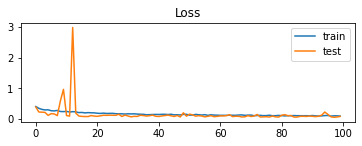

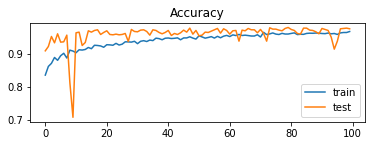

In [67]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()